In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$\frac{dx}{dt} = -bx + sin{(y)}$$  
$$\frac{dy}{dt} = -by + sin{(z)}$$  
$$\frac{dz}{dt} = -bz + sin{(x)}$$  

In [86]:
# x += -bx + sin(y) * dt 
# y += -by + sin(z) * dt 
# z += -bz + sin(x) * dt

def thomas(init_condition: tuple[float, float, float], b: float, dt: float, dur: float) -> np.ndarray:
    
    samples = int(np.ceil(dur / dt))
    
    xs = np.zeros(samples, dtype=np.float64)
    ys = np.zeros(samples, dtype=np.float64)
    zs = np.zeros(samples, dtype=np.float64)

    x, y, z, = init_condition
    
    for i in range(samples):
        
        xs[i] = x
        ys[i] = y
        zs[i] = z
        
        xdot = -b * x + np.sin(y)
        ydot = -b * y + np.sin(z)
        zdot = -b * z + np.sin(x)
        
        x += xdot * dt
        y += ydot * dt
        z += zdot * dt
    
    return xs, ys, zs

In [101]:
t1 = thomas(init_condition=(0.1, 0, 0), b=0.19, dt=0.05, dur=1000)
t2 = thomas(init_condition=(0.3, 0, 0), b=0.19, dt=0.05, dur=1000)


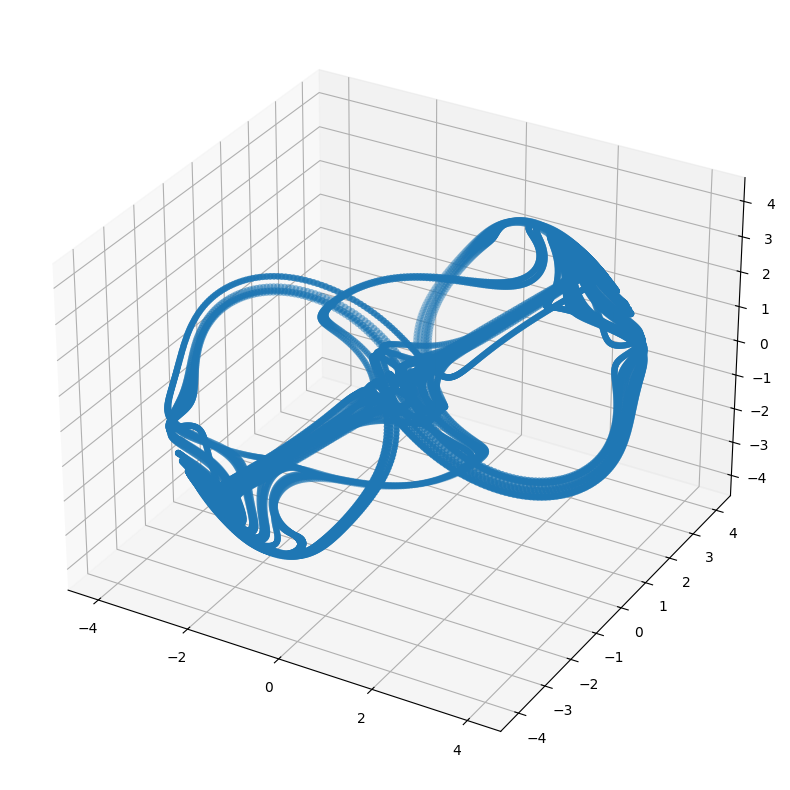

In [104]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

ax.scatter(t1[0], t1[1], t1[2], linewidth=0.1)
# ax.scatter(t2[0], t2[1], t2[2], linewidth=0.1)
plt.show()

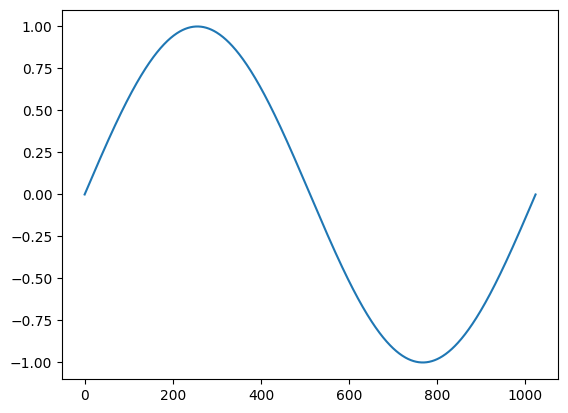

In [106]:
# table osc

N = 1024
t = np.arange(N)
wt = np.sin(2 * np.pi * t / (N - 1))

plt.plot(wt)
plt.show()

In [112]:
def oscillator(table: np.ndarray, freq: float, sr: int, dur: float) -> np.ndarray:
    
    si = freq * table.size / sr
    dur_samples = int(np.ceil(sr * dur))
    
    y = np.zeros(dur_samples, dtype=np.float64)
    
    increment = 0
    for i in range(dur_samples):
        
        index = int(increment)
        frac = increment - index
    
        y[i] = frac * table[index] + (1 - frac) * table[index + 1] 
        
        increment += si
        increment = increment if increment < table.size - 1 else increment - table.size
        
    return y
    
    

In [113]:
sine = oscillator(table=wt, freq=440, sr=44100, dur=3.0)

In [114]:
from IPython.display import Audio

Audio(sine, rate=44100)